In [70]:
# importing packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [71]:
# load dataset
df = pd.read_csv("C:/Users/NOOMAN KHAN/Downloads/Acoustic_Extinguisher_Fire_Dataset.xlsx - Sheet1.csv")

In [72]:

df.head()

,SIZE,FUEL,DISTANCE,DESIBEL,AIRFLOW,FREQUENCY,STATUS
0,1.0,gasoline,10,96.0,0.0,75.0,0
1,1.0,gasoline,10,96.0,0.0,72.0,1
2,1.0,gasoline,10,96.0,2.6,70.0,1
3,1.0,gasoline,10,96.0,3.2,68.0,1
4,NaN,gasoline,10,109.0,4.5,67.0,1


In [73]:
df.shape

(17442, 7)

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17442 entries, 0 to 17441
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SIZE       16919 non-null  float64
 1   FUEL       16920 non-null  object 
 2   DISTANCE   16920 non-null  object 
 3   DESIBEL    16919 non-null  float64
 4   AIRFLOW    16919 non-null  float64
 5   FREQUENCY  16919 non-null  float64
 6   STATUS     17442 non-null  int64  
dtypes: float64(4), int64(1), object(2)
memory usage: 954.0+ KB


In [75]:
df.isnull().sum()

SIZE         523
FUEL         522
DISTANCE     522
DESIBEL      523
AIRFLOW      523
FREQUENCY    523
STATUS         0
dtype: int64

Removing Noise

In [76]:

df["FUEL"].value_counts()

kerosene    4996
thinner     4973
gasoline    4962
lpg         1988
%%             1
Name: FUEL, dtype: int64

In [77]:
df["FUEL"]=df["FUEL"].replace("%%",np.nan)

In [78]:
df["FUEL"].value_counts()

kerosene    4996
thinner     4973
gasoline    4962
lpg         1988
Name: FUEL, dtype: int64

In [79]:
df["DISTANCE"].unique()

array(['10', '20', nan, '30', '40', '50', '60', '70', '$$', '80', '90',
       '100', '110', '120', '130', '140', '150', '160', '170', '180',
       '190'], dtype=object)

In [80]:
df["DISTANCE"] = np.where(df["DISTANCE"]=="$$",np.nan,df["DISTANCE"])

In [81]:
df["DISTANCE"].unique()

array(['10', '20', nan, '30', '40', '50', '60', '70', '80', '90', '100',
       '110', '120', '130', '140', '150', '160', '170', '180', '190'],
      dtype=object)

In [82]:
df["DISTANCE"]=df["DISTANCE"].astype("float64")

In [83]:
df.dtypes

SIZE         float64
FUEL          object
DISTANCE     float64
DESIBEL      float64
AIRFLOW      float64
FREQUENCY    float64
STATUS         int64
dtype: object

In [84]:
df["STATUS"].value_counts()

0    8759
1    8683
Name: STATUS, dtype: int64

EDA

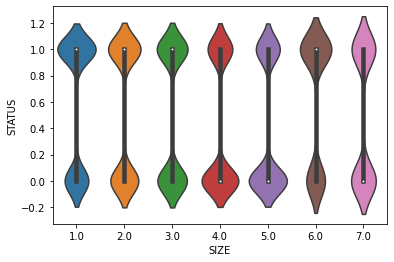

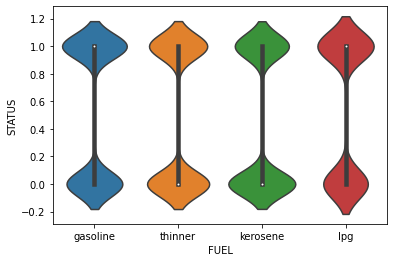

In [85]:
for i in ["SIZE","FUEL"]:
    plt.figure()
    sns.violinplot(x = df[i] , y = df["STATUS"])

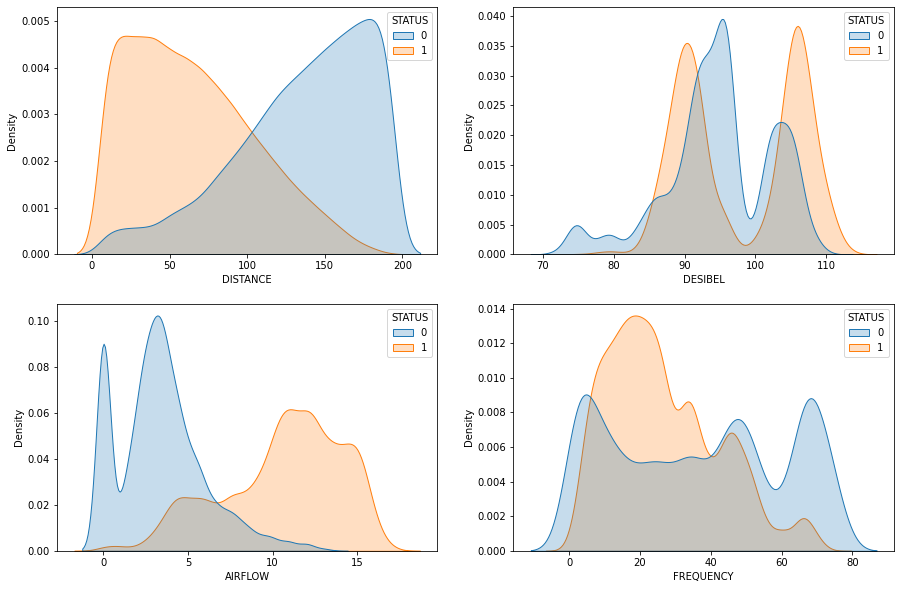

In [86]:
fig , ax = plt.subplots(2,2 , figsize = (15,10))
cols = ["DISTANCE","DESIBEL","AIRFLOW","FREQUENCY"]
index = 0
for i in range(2):
    for j in range(2):
        sns.kdeplot(x = df[cols[index]] , hue = df["STATUS"] , fill = True, ax = ax[i][j])
        index+=1
    

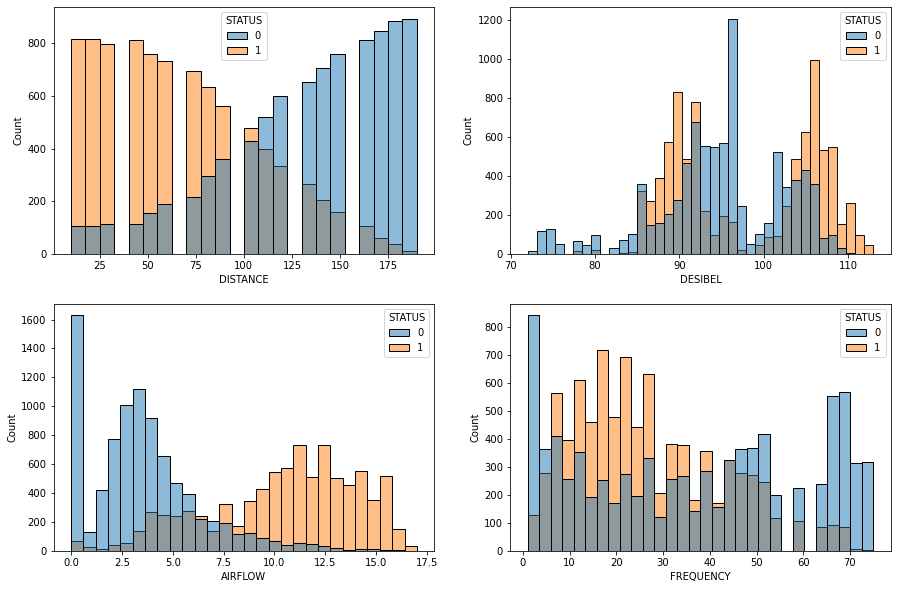

In [108]:
fig , ax = plt.subplots(2,2 , figsize = (15,10))
cols = ["DISTANCE","DESIBEL","AIRFLOW","FREQUENCY"]
index = 0
for i in range(2):
    for j in range(2):
        sns.histplot(x = df[cols[index]] , hue = df["STATUS"] , fill = True, ax = ax[i][j])
        index+=1

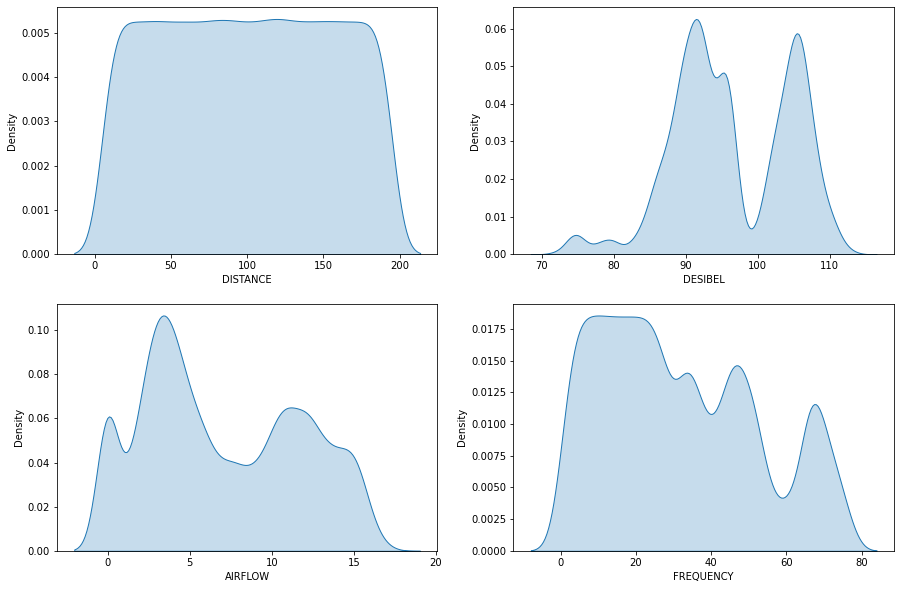

In [88]:
fig , ax = plt.subplots(2,2 , figsize = (15,10))
cols = ["DISTANCE","DESIBEL","AIRFLOW","FREQUENCY"]
index = 0
for i in range(2):
    for j in range(2):
        sns.kdeplot(x = df[cols[index]]   , fill = True, ax = ax[i][j])
        index+=1

In [89]:
df.describe()

,SIZE,DISTANCE,DESIBEL,AIRFLOW,FREQUENCY,STATUS
count,16919.000000,16919.000000,16919.000000,16919.000000,16919.000000,17442.000000
mean,3.415214,99.961582,96.376441,6.977499,31.615639,0.497821
std,1.752139,54.734836,8.160081,4.736850,20.954487,0.500010
min,1.000000,10.000000,72.000000,0.000000,1.000000,0.000000
25%,2.000000,50.000000,90.000000,3.200000,14.000000,0.000000
50%,3.000000,100.000000,95.000000,5.800000,27.000000,0.000000
75%,5.000000,150.000000,104.000000,11.200000,47.000000,1.000000
max,7.000000,190.000000,113.000000,17.000000,75.000000,1.000000


Null Value Analysis

In [90]:
df.isnull().sum()

SIZE         523
FUEL         523
DISTANCE     523
DESIBEL      523
AIRFLOW      523
FREQUENCY    523
STATUS         0
dtype: int64

In [91]:
for i in df.columns:
    print(df[i].value_counts())

5.0    2991
4.0    2990
1.0    2985
3.0    2983
2.0    2972
7.0    1001
6.0     997
Name: SIZE, dtype: int64
kerosene    4996
thinner     4973
gasoline    4962
lpg         1988
Name: FUEL, dtype: int64
120.0    906
80.0     898
90.0     895
40.0     894
10.0     893
110.0    892
180.0    891
20.0     891
150.0    891
60.0     890
160.0    890
130.0    889
140.0    888
170.0    887
50.0     886
30.0     886
70.0     885
100.0    884
190.0    883
Name: DISTANCE, dtype: int64
92.0     1418
96.0     1324
106.0    1320
90.0     1073
105.0    1036
91.0      933
104.0     842
89.0      762
93.0      744
95.0      739
94.0      634
108.0     622
102.0     597
107.0     595
103.0     576
88.0      538
86.0      428
87.0      412
97.0      262
110.0     262
101.0     250
85.0      232
109.0     181
75.0      133
100.0     118
80.0      115
74.0      115
84.0      114
111.0      98
78.0       83
83.0       81
76.0       51
98.0       51
79.0       50
112.0      34
82.0       33
99.0       32
72.0

In [92]:
df.head(2)

,SIZE,FUEL,DISTANCE,DESIBEL,AIRFLOW,FREQUENCY,STATUS
0,1.0,gasoline,10.0,96.0,0.0,75.0,0
1,1.0,gasoline,10.0,96.0,0.0,72.0,1


In [55]:
df.isnull().sum()

SIZE         523
FUEL         523
DISTANCE     523
DESIBEL      523
AIRFLOW      523
FREQUENCY    523
STATUS         0
dtype: int64

Impute Null value from Random Imputation beacuse there is categorical feature is we go with mean/median the value become that;s not possible

In [93]:
random_sample = df["SIZE"].dropna().sample(df["SIZE"].isnull().sum(),random_state = 1)
random_sample.index = df[df["SIZE"].isnull()].index
df.loc[df["SIZE"].isnull(),"SIZE"] = random_sample

In [94]:
df.isnull().sum()

SIZE           0
FUEL         523
DISTANCE     523
DESIBEL      523
AIRFLOW      523
FREQUENCY    523
STATUS         0
dtype: int64

In [97]:
random_sample = df["FUEL"].dropna().sample(df["FUEL"].isnull().sum(),random_state = 1)
random_sample.index = df[df["FUEL"].isnull()].index
df.loc[df["FUEL"].isnull(),"FUEL"] = random_sample

In [98]:
random_sample = df["DISTANCE"].dropna().sample(df["DISTANCE"].isnull().sum(),random_state = 1)
random_sample.index = df[df["DISTANCE"].isnull()].index
df.loc[df["DISTANCE"].isnull(),"DISTANCE"] = random_sample

In [99]:
random_sample = df["DESIBEL"].dropna().sample(df["DESIBEL"].isnull().sum(),random_state = 1)
random_sample.index = df[df["DESIBEL"].isnull()].index
df.loc[df["DESIBEL"].isnull(),"DESIBEL"] = random_sample

In [101]:
random_sample = df["AIRFLOW"].dropna().sample(df["AIRFLOW"].isnull().sum(),random_state = 1)
random_sample.index = df[df["AIRFLOW"].isnull()].index
df.loc[df["AIRFLOW"].isnull(),"AIRFLOW"] = random_sample

In [104]:
random_sample = df["FREQUENCY"].dropna().sample(df["FREQUENCY"].isnull().sum(),random_state = 1)
random_sample.index = df[df["FREQUENCY"].isnull()].index
df.loc[df["FREQUENCY"].isnull(),"FREQUENCY"] = random_sample

In [105]:
df.isnull().sum()

SIZE         0
FUEL         0
DISTANCE     0
DESIBEL      0
AIRFLOW      0
FREQUENCY    0
STATUS       0
dtype: int64

In [107]:
df.head()

,SIZE,FUEL,DISTANCE,DESIBEL,AIRFLOW,FREQUENCY,STATUS
0,1.0,gasoline,10.0,96.0,0.0,75.0,0
1,1.0,gasoline,10.0,96.0,0.0,72.0,1
2,1.0,gasoline,10.0,96.0,2.6,70.0,1
3,1.0,gasoline,10.0,96.0,3.2,68.0,1
4,5.0,gasoline,10.0,109.0,4.5,67.0,1


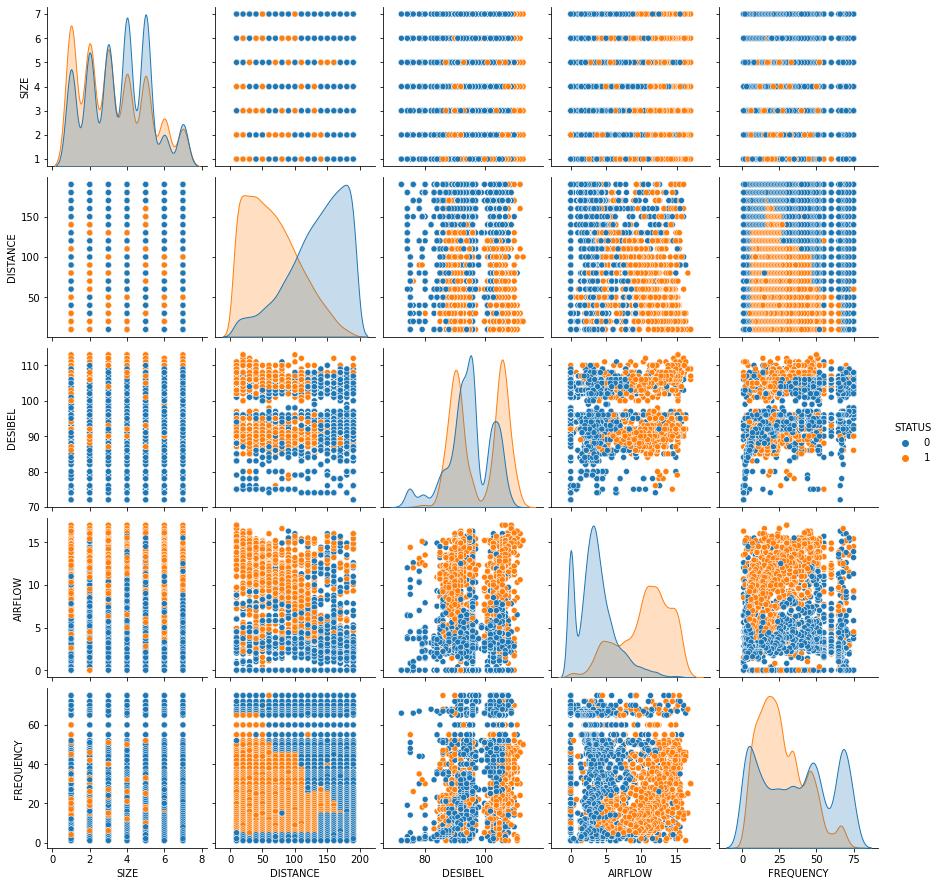

In [110]:
sns.pairplot(df , hue = "STATUS")

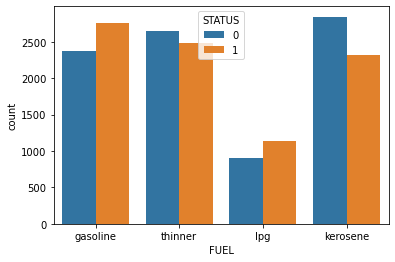

In [115]:
sns.countplot(x = df["FUEL"] , hue = df["STATUS"])
plt.show()

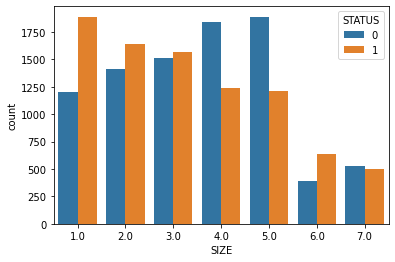

In [116]:
sns.countplot(x = df["SIZE"] , hue = df["STATUS"])
plt.show()

In [124]:
df.head()

,SIZE,FUEL,DISTANCE,DESIBEL,AIRFLOW,FREQUENCY,STATUS
0,1.0,gasoline,10.0,96.0,0.0,75.0,0
1,1.0,gasoline,10.0,96.0,0.0,72.0,1
2,1.0,gasoline,10.0,96.0,2.6,70.0,1
3,1.0,gasoline,10.0,96.0,3.2,68.0,1
4,5.0,gasoline,10.0,109.0,4.5,67.0,1


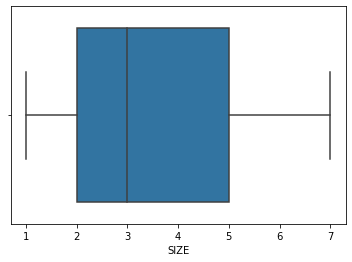

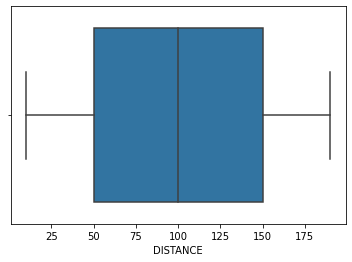

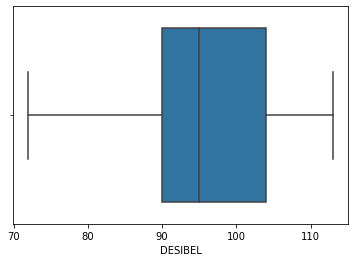

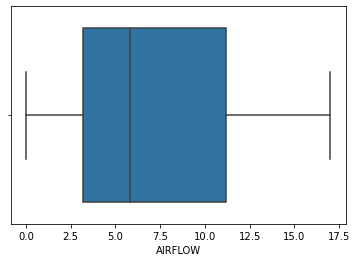

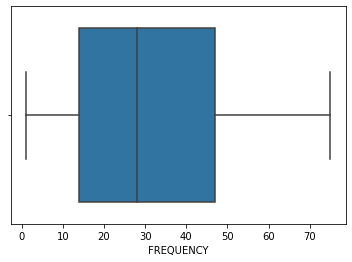

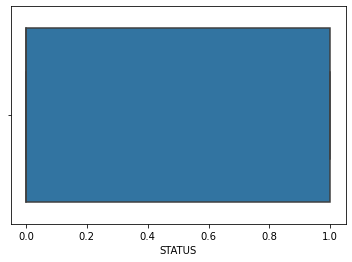

In [119]:
numeric = ["int32","int64","float32","float64"]
for i in df.select_dtypes(include = numeric).columns:
    plt.figure()
    sns.boxplot(x = df[i])

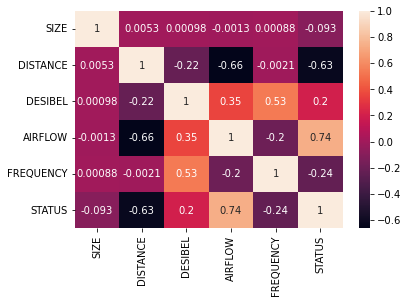

In [128]:
sns.heatmap(df.corr(),annot = True)
plt.show()

In [130]:
df.head()

,SIZE,FUEL,DISTANCE,DESIBEL,AIRFLOW,FREQUENCY,STATUS
0,1.0,gasoline,10.0,96.0,0.0,75.0,0
1,1.0,gasoline,10.0,96.0,0.0,72.0,1
2,1.0,gasoline,10.0,96.0,2.6,70.0,1
3,1.0,gasoline,10.0,96.0,3.2,68.0,1
4,5.0,gasoline,10.0,109.0,4.5,67.0,1


In [131]:
df["FUEL"].value_counts()

kerosene    5154
thinner     5123
gasoline    5121
lpg         2044
Name: FUEL, dtype: int64

In [132]:
df = pd.get_dummies(data = df , columns = ["FUEL"] ,drop_first = True)

In [134]:
X = df.drop("STATUS" , axis=1)
Y = df[["STATUS"]]

In [135]:
from sklearn.model_selection import train_test_split
X_train , X_test , Y_train , Y_test = train_test_split(X,Y,test_size = 0.2,
                                                      random_state = 42)


In [137]:
from sklearn.ensemble import RandomForestClassifier
model =RandomForestClassifier()

In [139]:
from sklearn.model_selection import RandomizedSearchCV
n_estimators = [int(x) for x in np.linspace(100,100,10)]
criterion = [ 'gini', 'entropy', 'log_loss']
max_depth = [int(x) for x in np.linspace(10,100,10)]
min_samples_split = [1,3,5,6,7,8,9,10,11,12]
min_samples_leaf = [1,3,5,6,7,8,9,10,11,12]
max_features = ['sqrt', 'log2', None]
n_jobs = -1

params = {
    'n_estimators':n_estimators,
    'criterion':criterion,
    'max_depth':max_depth,
    'min_samples_split':min_samples_split,
    'min_samples_leaf':min_samples_leaf,
    'max_features':max_features}

In [140]:
random_grid = RandomizedSearchCV(estimator = model ,param_distributions=params,n_iter=100,
                                n_jobs = -1 , cv=5 , scoring = "accuracy")

In [141]:
random_grid.fit(X_train , Y_train)

C:\Users\NOOMAN KHAN\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
75 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
75 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\NOOMAN KHAN\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\NOOMAN KHAN\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 476, in fit
    trees = Parallel(
  File "C:\Users\NOOMAN KHAN\anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\NOOMAN KHAN

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100],
                                        'max_features': ['sqrt', 'log2', None],
                                        'min_samples_leaf': [1, 3, 5, 6, 7, 8,
                                                             9, 10, 11, 12],
                                        'min_samples_split': [1, 3, 5, 6, 7, 8,
                                                              9, 10, 11, 12],
                                        'n_estimators': [100, 100, 100, 100,
                                                         100, 100, 100, 100,
                                                         100, 100]},
                   scoring='accuracy')

In [142]:
random_grid.best_params_

{'n_estimators': 100,
 'min_samples_split': 6,
 'min_samples_leaf': 3,
 'max_features': None,
 'max_depth': 80,
 'criterion': 'log_loss'}

In [144]:
RFC = RandomForestClassifier(n_estimators= 100,
 min_samples_split= 6,
 min_samples_leaf=3,
 max_features= None,
 max_depth=80,
 criterion='log_loss')

In [145]:
RFC

RandomForestClassifier(criterion='log_loss', max_depth=80, max_features=None,
                       min_samples_leaf=3, min_samples_split=6)

In [146]:
RFC.fit(X_train , Y_train)

C:\Users\NOOMAN KHAN\AppData\Local\Temp\ipykernel_21272\3172814850.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RFC.fit(X_train , Y_train)


RandomForestClassifier(criterion='log_loss', max_depth=80, max_features=None,
                       min_samples_leaf=3, min_samples_split=6)

In [147]:
Y_pred = RFC.predict(X_test)

In [148]:
from sklearn import metrics
metrics.confusion_matrix(Y_test,Y_pred)

array([[1630,   84],
       [  89, 1686]], dtype=int64)

In [149]:
metrics.accuracy_score(Y_test,Y_pred)

0.9504155918601318

In [151]:
print(metrics.classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95      1714
           1       0.95      0.95      0.95      1775

    accuracy                           0.95      3489
   macro avg       0.95      0.95      0.95      3489
weighted avg       0.95      0.95      0.95      3489

